In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import requests

url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"
df = pd.read_html(url, header=0) #Importer dataen med read_html
df = df[0]
df

,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [142]:
df[["WLTP-tall", "WLTP-kWh"]] = df["WLTP-tall"].str.split("/", expand=True) 
df[['WLTP-tall', 'WLTP-kWh']] = df['WLTP-tall'].str.split(' ', expand=True)
df[['STOPP', 'stopp1']] = df['STOPP'].str.split(' ', expand=True)
#Splitter alle kolonnene ved hjelp av str.split 


In [144]:
df = df.dropna() # Stopp 1 lager NA verdier der hvor "x" sto i datasettet derfor trenger vi kun å bruke dropna for å fjerne alle radene med na verdier 
df["WLTP-tall"] = df["WLTP-tall"].astype(float)
df["STOPP"] = df["STOPP"].astype(float) # gjør kolonnene vi vil ha til floats

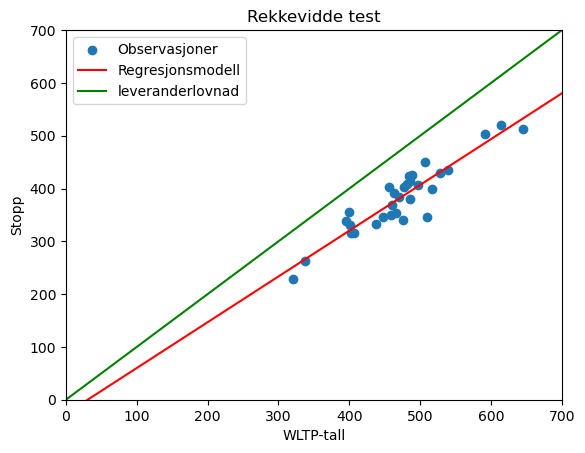

In [145]:
x = np.linspace(0,700,100)
fig, ax = plt.subplots() 
ax.set_ylabel("Stopp") 
ax.set_xlabel("WLTP-tall") #legger til x og y labs
ax.scatter(df["WLTP-tall"], df["STOPP"], label = "Observasjoner") #Legger inn observasjonene med scatter plot
reg = np.polyfit(df["WLTP-tall"], df["STOPP"], 1) #Setter opp modellen for regresjon
ax.plot(x, a*x+b, color = "red", label = "Regresjonsmodell") #Bruker formelen og for å plotte den lineære regresjonen
ax.set_xlim(0,700)
ax.set_ylim(0,700) #setter limit på aksene slik av starter fra origo
ax.set_title("Rekkevidde test") #tittel
plt.axline([0,0], [700,700],color = "green", label = "leveranderlovnad") #lager en 45 grader linje med axline
ax.legend() #legger på legend
